# Загрузка датасета

In [95]:
import pandas as pd

df = pd.read_csv("Malicious-URLs.csv")
urls = df["url"].values
print(len(urls))

df

15000


,count,url,type
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=Hannah_Webster_Foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


In [96]:
df.info

<bound method DataFrame.info of        count                                                url        type
0          0                                   br-icloud.com.br    phishing
1          1                mp3raid.com/music/krizz_kaliko.html      benign
2          2                    bopsecrets.org/rexroth/cr/1.htm      benign
3          3  http://www.garage-pirenne.be/index.php?option=...  defacement
4          4  http://adventure-nicaragua.net/index.php?optio...  defacement
...      ...                                                ...         ...
14995  14995                               fortdefianceind.com/      benign
14996  14996   bookrags.com/lens/go.php?u=Hannah_Webster_Foster      benign
14997  14997       burbankairport.com/parking/buses-trains.html      benign
14998  14998  http://otomoto.pl/oferta/subaru-outback-legacy...      benign
14999  14999                    sfmuseum.org/hist2/bbridge.html      benign

[15000 rows x 3 columns]>

In [97]:
df.describe()

,count
count,15000.000000
mean,7499.500000
std,4330.271354
min,0.000000
25%,3749.750000
50%,7499.500000
75%,11249.250000
max,14999.000000


In [98]:
df.head(10)

,count,url,type
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,8,http://www.pashminaonline.com/pure-pashminas,defacement
9,9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [99]:
df.isnull().sum()

count    0
url      0
type     0
dtype: int64

In [100]:
import seaborn as sns

In [101]:
count = df.type.value_counts()
count

type
benign        10991
defacement     2729
phishing        912
malware         368
Name: count, dtype: int64

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_24100\805402128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count, palette='bright')


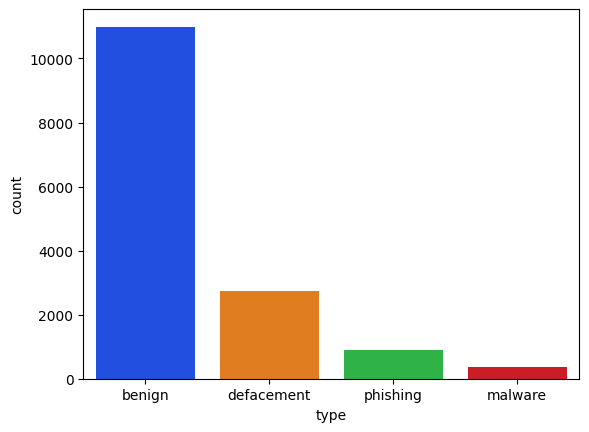

In [102]:
import matplotlib.pyplot as plt
sns.barplot(x=count.index, y=count, palette='bright')
plt.xlabel('type')
plt.ylabel('count');

# Предобработка данных 

## удаляем дубликаты

In [103]:
df = df.drop_duplicates(subset="url")
df

,count,url,type
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=Hannah_Webster_Foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


## нормализуем URL

In [104]:
df["url"] = df["url"].str.lower()
df

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_24100\4216137420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["url"] = df["url"].str.lower()


,count,url,type
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=hannah_webster_foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


In [105]:
import tldextract
from urllib.parse import urlparse

def extract_features(url):
    features = {}

    features["length"] = len(url)
    features["num_special_chars"] = sum(1 for c in url if c in ['@', '//', '%']) # это лексические признаки
    
    ext = tldextract.extract(url)
    features["subdomain_count"] = len(ext.subdomain.split('.')) if ext.subdomain else 0
    features["has_ip"] = 1 if any(part.isdigit() for part in ext.domain.split('.')) else 0 # это разбор домена
    
    keywords = ['login', 'admin', 'exe', 'php', 'config']
    features["keyword_count"] = sum(1 for kw in keywords if kw in url) # это сематика
    
    return features

features = df["url"].apply(extract_features)
features_df = pd.DataFrame(features.tolist())

In [106]:
features_df

,length,num_special_chars,subdomain_count,has_ip,keyword_count
0,16,0,0,0,0
1,35,0,0,0,0
2,31,0,0,0,0
3,88,0,1,0,1
4,200,0,0,0,1
...,...,...,...,...,...
14928,20,0,0,0,0
14929,48,0,0,0,1
14930,44,0,0,0,0
14931,108,0,0,0,0


## токенизация и векторизация

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Токенизация URL
tokenizer = Tokenizer(num_words=10000, char_level=False, lower=True)
tokenizer.fit_on_texts(df["url"])
sequences = tokenizer.texts_to_sequences(df["url"])

# Выравнивание длины последовательностей
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Объединение с извлечёнными признаками
import numpy as np
X_features = np.array(features_df)
X_final = np.concatenate([X_padded, X_features], axis=1)


In [108]:
print("Размер X_padded:", X_padded.shape)
print("Размер X_features:", X_features.shape)

Размер X_padded: (14933, 100)
Размер X_features: (14933, 5)


In [109]:
X_features

array([[ 16,   0,   0,   0,   0],
       [ 35,   0,   0,   0,   0],
       [ 31,   0,   0,   0,   0],
       ...,
       [ 44,   0,   0,   0,   0],
       [108,   0,   0,   0,   0],
       [ 31,   0,   0,   0,   0]], dtype=int64)

In [110]:
 X_padded

array([[  59, 3860,    1, ...,    0,    0,    0],
       [1218,    1,   81, ...,    0,    0,    0],
       [9292,    8, 9293, ...,    0,    0,    0],
       ...,
       [   1, 8500, 6809, ...,    0,    0,    0],
       [   2,  845,  120, ...,    0,    0,    0],
       [   8,    3,    0, ...,    0,    0,    0]])